In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/800px-Image_processing_pre_otsus_algorithm.jpg')
img.shape

(600, 800, 3)

In [3]:
img = img[:, :, 0]
img.shape

(600, 800)

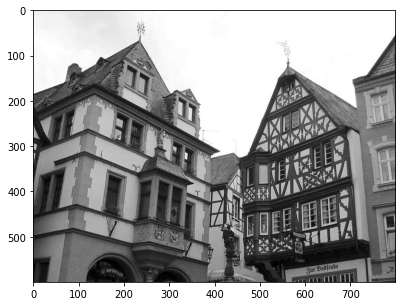

In [24]:
plt.figure(figsize = (10, 5))
plt.imshow(img, cmap='gray')

In [5]:
class Otsus:
  def __init__(self, img):
    self.img_hist, img_hist_bins = np.histogram(img, bins=range(257))
    self.img_hist_bins = img_hist_bins[:-1]

  def compute_otus_criteria(self, threshold):
    first_class_quantity = np.sum(self.img_hist[:threshold])
    second_class_quantity = np.sum(self.img_hist[threshold:])

    first_class_prob = first_class_quantity / img.size
    second_class_prob = 1 - first_class_prob

    if first_class_prob == 0 or second_class_prob == 0:
      return -np.inf

    first_class_mean = self.img_hist[self.img_hist_bins < threshold] @ \
                       self.img_hist_bins[self.img_hist_bins < threshold] / first_class_prob
    second_class_mean = self.img_hist[self.img_hist_bins >= threshold] @ \
                        self.img_hist_bins[self.img_hist_bins >= threshold] / second_class_prob

    return first_class_prob * second_class_prob * (first_class_mean - second_class_mean)**2
  
  def get_true_threshold(self):
    intra_class_vars = []

    for threshold in range(256):
      intra_class_vars.append(self.compute_otus_criteria(threshold))

    return np.argmax(np.array(intra_class_vars))

In [6]:
model = Otsus(img)

In [7]:
true_threshold = model.get_true_threshold()
true_threshold

152

In [8]:
img_hist, img_hist_bins = np.histogram(img, bins=range(257))
img_hist_bins = img_hist_bins[:-1]

(0.0, 4000.0)

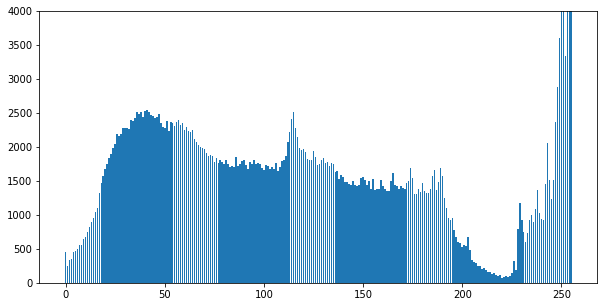

In [22]:
plt.figure(figsize = (10, 5))
plt.bar(img_hist_bins, img_hist)
plt.ylim(0, 4000)

(0.0, 4000.0)

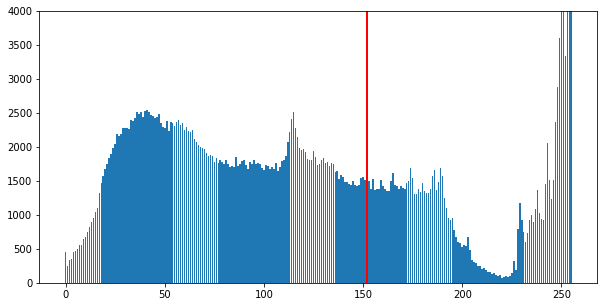

In [23]:
plt.figure(figsize = (10, 5))
plt.bar(img_hist_bins, img_hist)
plt.bar(true_threshold, 5000, color='red')
plt.ylim(0, 4000)

In [11]:
img_bin = np.zeros_like(img)

In [12]:
img_bin[img >= true_threshold] = 255

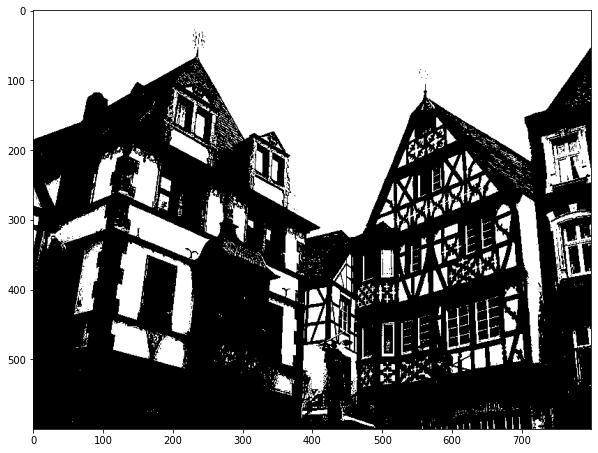

In [13]:
plt.figure(figsize = (10, 15))
plt.imshow(img_bin, cmap='gray')